<a href="https://colab.research.google.com/github/ferozferoz/DeepLearn/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()

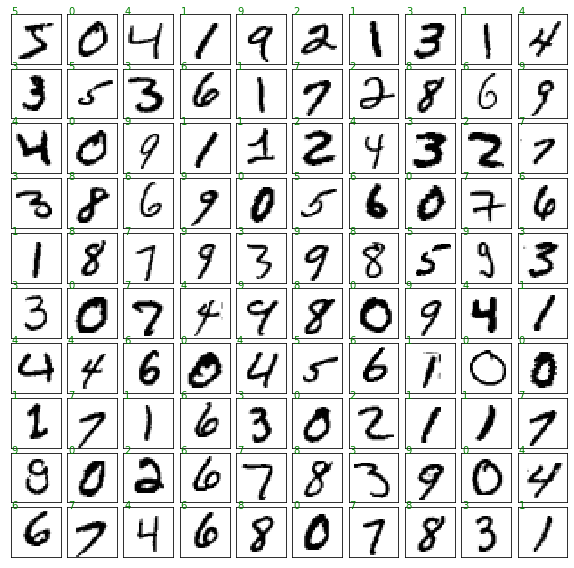

In [25]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(10,10,figsize=(10,10),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
# when we use enumerate we can iterate over the item along with an index
for i,ax in enumerate(axes.flat):
    ax.imshow(train_x[i], cmap='binary', interpolation='nearest')
    ax.text(.05,.05,str(train_y[i]),color='green')

In [26]:
print(train_x.shape)
train_x = train_x.reshape(train_x.shape[0],-1) # -1 will collapse all the left out dimensions
train_x = train_x.astype('float32') / 255
test_x = test_x.reshape(test_x.shape[0],-1) # -1 will collapse all the left out dimensions
test_x = test_x.astype('float32') / 255
print(train_x.shape)






(60000, 28, 28)
(60000, 784)


In [0]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)


In [5]:
# training neural network using a simple fully connected layer

from keras import models,layers
network = models.Sequential()
network.add(layers.Dense(128,activation='relu',input_shape=(784,)))
network.add(layers.Dense(10,activation='softmax'))
network.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
network.fit(train_x, train_y, epochs=5, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 3s 45us/step - loss: 0.3326 - acc: 0.9086
Epoch 2/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.1664 - acc: 0.9518
Epoch 3/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.1206 - acc: 0.9648
Epoch 4/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0945 - acc: 0.9728
Epoch 5/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.0775 - acc: 0.9773


In [29]:
train_loss, train_accuracy = network.evaluate(train_x,train_y)
print(train_loss)
print(train_accuracy)

60000/60000 [==============================] - 2s 25us/step
0.0608800775098304
0.9824166666666667


In [9]:
test_loss, test_accuracy = network.evaluate(test_x,test_y)
print(test_loss)
print(test_accuracy)  # the fall in accuracy indicates there is overfitting involved. 

10000/10000 [==============================] - 0s 24us/step
0.088510158385057
0.974


In [10]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
cnn_model.add(layers.MaxPool2D(2,2))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(1600,activation='relu'))
cnn_model.add(layers.Dense(10,activation='softmax'))
cnn_model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1600)              2561600   
_________________________________________________________________
dense_4 (Dense)              (None, 10)              

In [0]:
(cnn_train_x,cnn_train_y),(cnn_test_x,cnn_test_y) = mnist.load_data()

In [12]:
print(cnn_train_x.shape)
cnn_train_x = cnn_train_x.reshape(cnn_train_x.shape[0],cnn_train_x.shape[1],cnn_train_x.shape[2],1) # -1 will collapse all the left out dimensions
cnn_train_x = cnn_train_x.astype('float32') / 255
cnn_test_x = cnn_test_x.reshape(cnn_test_x.shape[0],cnn_test_x.shape[1],cnn_test_x.shape[2],1) # -1 will collapse all the left out dimensions
cnn_test_x = cnn_test_x.astype('float32') / 255
print(cnn_train_x.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [0]:
cnn_train_y = to_categorical(cnn_train_y)
cnn_test_y = to_categorical(cnn_test_y)


In [14]:
cnn_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
cnn_model.fit(cnn_train_x,cnn_train_y,epochs=5,batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 120s 2ms/step - loss: 0.1339 - acc: 0.9589
Epoch 2/5
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0445 - acc: 0.9871
Epoch 3/5
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0307 - acc: 0.9912
Epoch 4/5
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0235 - acc: 0.9934
Epoch 5/5
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0187 - acc: 0.9950


In [40]:
cnn_predict_y = cnn_model.predict_classes(cnn_test_x)
print(cnn_test_y.shape)
cnn_predict_y.shape

(10000, 10)


(10000,)

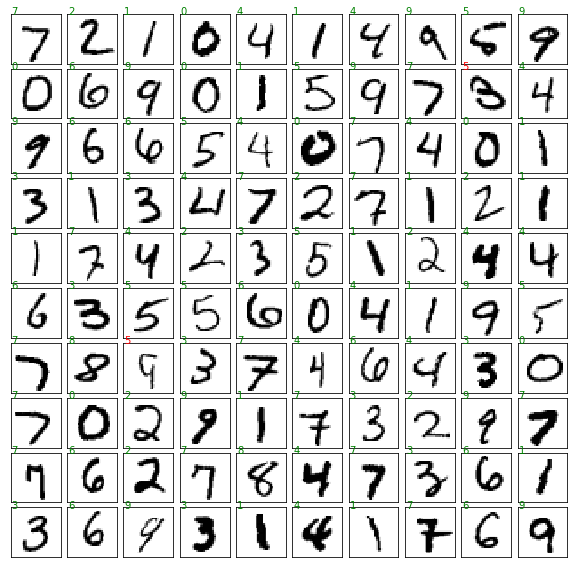

In [42]:
fig,axes = plt.subplots(10,10,figsize=(10,10),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
# when we use enumerate we can iterate over the item along with an index
for i,ax in enumerate(axes.flat):
    ax.imshow(cnn_test_x[i].reshape(28,28), cmap='binary', interpolation='nearest')
    ax.text(.05,.05,str(cnn_predict_y[i]),color='green' if (cnn_predict_y[i] == cnn_test_y[i]) else 'red' ) 

In [0]:
"""Next we would like to see how can we use Recurrent Neural Network to apporach this problem. 
The input data is of shape (sample,x,y) we will consider x as timestep and y as features"""

'Next we would like to see how can we use Recurrent Neural Network to apporach this problem. \nThe input data is of shape (sample,x,y) we will consider x as timestep and y as features'

In [43]:
rnn_model = models.Sequential()
rnn_model.add(layers.LSTM(128,activation='relu',input_shape=(28,28) ))
rnn_model.add(layers.BatchNormalization())
rnn_model.add(layers.Dense(10,activation='softmax'))
rnn_model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               80384     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 82,186
Trainable params: 81,930
Non-trainable params: 256
_________________________________________________________________


In [0]:
(rnn_train_x,rnn_train_y),(rnn_test_x,rnn_test_y) = mnist.load_data()
rnn_train_x = rnn_train_x.astype('float32') / 255
rnn_test_x = rnn_test_x.astype('float32') / 255
rnn_train_y = to_categorical(rnn_train_y)
rnn_test_y = to_categorical(rnn_test_y)

In [45]:
rnn_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
rnn_model.fit(rnn_train_x, rnn_train_y, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 36s 594us/step - loss: 0.3271 - acc: 0.8979
Epoch 2/5
60000/60000 [==============================] - 35s 577us/step - loss: 0.1057 - acc: 0.9677
Epoch 3/5
60000/60000 [==============================] - 35s 576us/step - loss: 0.0730 - acc: 0.9773
Epoch 4/5
60000/60000 [==============================] - 35s 576us/step - loss: 0.0588 - acc: 0.9815
Epoch 5/5
60000/60000 [==============================] - 35s 576us/step - loss: 0.0477 - acc: 0.9854


In [46]:
rnn_test_loss,rnn_test_accuracy = rnn_model.evaluate(rnn_test_x,rnn_test_y)
rnn_test_accuracy

10000/10000 [==============================] - 3s 270us/step


0.9803